# Set up

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
# TODO: change this to the path to your homework folder
#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'MultiTaskLearning'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'coding/MultiTaskLearning/MultiTaskLearning'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Load the autoreload extension
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(GOOGLE_DRIVE_PATH)

Mounted at /content/drive
['__pycache__', 'Features', 'model', '.ipynb_checkpoints', 'train_binary.py', 'train_score.py', 'rm_by_index.py', 'dataset.py', 'dataset2.py', 'train.py', 'execute.ipynb']


# Run the codes

In [ ]:
from dataset2 import *
from fastai import *
from fastai.vision import *
from fastai.layers import MSELossFlat, CrossEntropyFlat
from torchvision import transforms
from model.Multitask import *


In [ ]:
GOOGLE_DRIVE_PATH

'drive/My Drive/coding/MultiTaskLearning/MultiTaskLearning'

Load the data

In [ ]:
# from rm_by_index import*
# rmfunction()

In [ ]:
t=np.load("drive/My Drive/coding/MultiTaskLearning/MultiTaskLearning/Features/BERT/sentence_embeddingnew/308_sentence_embedding.npy")

In [ ]:
t

array([[-0.014025, -0.093894,  0.022021, -0.102955, ..., -0.01013 , -0.00795 , -0.039689, -0.019906],
       [-0.040325, -0.05597 ,  0.056026,  0.01884 , ...,  0.072106,  0.067028, -0.116036,  0.030143],
       [-0.038931, -0.051763,  0.010819,  0.034915, ...,  0.054853, -0.005571,  0.034493,  0.052289],
       [-0.045106, -0.031725,  0.015572,  0.009835, ..., -0.005307,  0.047452, -0.054334, -0.070705],
       ...,
       [ 0.003008, -0.05087 , -0.038753,  0.014213, ...,  0.097351,  0.041417,  0.082468, -0.057879],
       [-0.013648,  0.013379,  0.054314, -0.034734, ...,  0.090179, -0.067991,  0.04671 , -0.023302],
       [-0.020738, -0.018521, -0.006891, -0.066594, ...,  0.134706,  0.043116, -0.034066, -0.049541],
       [ 0.013684,  0.094033,  0.060588, -0.080336, ...,  0.132015, -0.017497, -0.001561,  0.016154]], dtype=float32)

In [ ]:
df_train = maketable(GOOGLE_DRIVE_PATH, "train")
df_valid = maketable(GOOGLE_DRIVE_PATH, "dev")  # validation
df_test = maketable(GOOGLE_DRIVE_PATH, "test") 
# df_train['name']

In [ ]:
len(df_valid)

144

In [ ]:
df_train

,Participant_ID,Utterance_ID,text_PATH,audio_PATH,PHQ_Binary,PHQ_Score
0,302,0,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
1,302,10,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
2,302,20,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
3,302,30,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
4,302,40,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
...,...,...,...,...,...,...
713,697,50,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
714,697,60,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
715,697,70,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0
716,697,80,drive/My Drive/coding/MultiTaskLearning/MultiT...,drive/My Drive/coding/MultiTaskLearning/MultiT...,0,0


In [ ]:

train_ds = MultiTaskDataset(df_train, "audio")
# print(train_ds[2])
valid_ds = MultiTaskDataset(df_valid, "audio")
test_ds = MultiTaskDataset(df_test,"audio")
train_dl = DataLoader(train_ds, batch_size=60, shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=30, shuffle=True, num_workers=2)
test_dl = DataLoader(test_ds, batch_size=30, shuffle=True, num_workers=2)
# train_dl = DataLoader(train_ds)
# valid_dl = DataLoader(valid_ds)
data = DataBunch(train_dl, valid_dl)

In [ ]:
# a = next(iter(train_dl))
# a

Train the model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
model = MultiTaskModel( ps = 0.1)

In [ ]:
model

MultiTaskModel(
  (fc1): Linear(in_features=880, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=2, bias=True)
  (fc5): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
  (sigmoid): Sigmoid()
  (drop): Dropout(p=0.1, inplace=False)
)

In [ ]:
from torchsummary import summary

In [ ]:
net = MultiTaskModel( ps = 0.1).to(device)
# visualizing the model
print('Your network:')
summary(net, (1,880), device=device)

Your network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1                  [-1, 880]               0
            Linear-2                 [-1, 2048]       1,804,288
              ReLU-3                 [-1, 2048]               0
            Linear-4                  [-1, 512]       1,049,088
              ReLU-5                  [-1, 512]               0
            Linear-6                  [-1, 128]          65,664
              ReLU-7                  [-1, 128]               0
            Linear-8                    [-1, 2]             258
            Linear-9                    [-1, 4]             516
Total params: 2,919,814
Trainable params: 2,919,814
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 11.14
Estimated Total Size (MB): 11.19
-----------------------

In [ ]:
min(df_train["PHQ_Score"])

0

In [ ]:
class_weights = get_class_stats(df_train)
class_weights

(tensor([334., 322.]), tensor([199., 140., 145., 172.]))

In [ ]:
import numpy as np
class_stats_bin, class_stats_score = get_class_stats(df_train)
class_stats_bin = torch.tensor(class_stats_bin)
class_stats_score = torch.tensor(class_stats_score)
class_weights_bin = class_stats_bin.sum() / class_stats_bin / class_stats_bin.shape[0]
print(class_weights_bin)
class_weights_bin = class_weights_bin.to(device)

class_weights_score = class_stats_score.sum() / class_stats_score / class_stats_score.shape[0]
print(class_weights_score)
class_weights_score = class_weights_score.to(device)
#class_weights=[class_weights_bin,class_weights_score]

tensor([0.9820, 1.0186])
tensor([0.8241, 1.1714, 1.1310, 0.9535])


In [ ]:
from train import *

model.to(device)
optim = get_optimizer(model, lr=1e-3, weight_decay=1e-6)
best_model, stats = train_model(model, train_dl, valid_dl, optim, (class_weights_bin, class_stats_score),
                                num_epoch=30, collect_cycle=5, device=device)

------------------------ Start Training ------------------------
Epoch No. 1--Iteration No. 11-- batch loss = 3.1596
Validation weighted macro F-1: 0.2676
Epoch No. 2--Iteration No. 22-- batch loss = 2.3763
Validation weighted macro F-1: 0.2882
Epoch No. 3--Iteration No. 33-- batch loss = 1.2206
Validation weighted macro F-1: 0.3586
Epoch No. 4--Iteration No. 44-- batch loss = 1.0586
Validation weighted macro F-1: 0.3649
Epoch No. 5--Iteration No. 55-- batch loss = 0.9389
Validation weighted macro F-1: 0.3609
Epoch No. 6--Iteration No. 66-- batch loss = 1.0378
Validation weighted macro F-1: 0.3548
Epoch No. 7--Iteration No. 77-- batch loss = 0.9851
Validation weighted macro F-1: 0.2498
Epoch No. 8--Iteration No. 88-- batch loss = 0.9974
Validation weighted macro F-1: 0.3498
Epoch No. 9--Iteration No. 99-- batch loss = 1.0351
Validation weighted macro F-1: 0.2751
Epoch No. 10--Iteration No. 110-- batch loss = 0.9623
Validation weighted macro F-1: 0.2935
Epoch No. 11--Iteration No. 121--

In [ ]:
print(stats['weighted_F1'])
print(stats['confusion_mat'][0])
print(stats['confusion_mat'][1])

0.36661566457685285
[[74 69]
 [57 51]]
[[31 12  6 21]
 [28 11 11 23]
 [12 11  3 22]
 [30  6  6 18]]


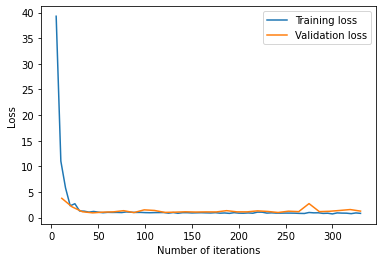

In [ ]:
plot_loss(stats)

In [ ]:
from train import *
_, wf1, _, c = get_validation_performance(best_model, class_weights, test_dl, device)
print("Test weighted F-1 for non-contextual classifier: {:.4f}".format(wf1))
print(c[0])
print(c[1])

Test weighted F-1 for non-contextual classifier: 0.3681
[[65 85]
 [65 83]]
[[21 10  4 38]
 [20  6  7 38]
 [24  2 12 27]
 [33  7 11 38]]


In [ ]:
class_weights = get_class_stats(df_test)
class_weights

(tensor([  0., 102.]), tensor([29.,  6.,  0., 48.,  9.,  0., 10.,  0.]))

In [ ]:
kernel_size = [3, 4, 5]
num_channel = 300

In [ ]:
from model.binary import *
from model.score import*

In [ ]:
model_score = ScoreModel(kernel_size=kernel_size,num_channel=num_channel, ps = 0.1)
model_score

ScoreModel(
  (textcnn): TextCNNEncoder(
    (convs): ModuleList(
      (0): Conv1d(384, 300, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): Conv1d(384, 300, kernel_size=(4,), stride=(1,), padding=(2,))
      (2): Conv1d(384, 300, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
  (textcnn2): TextCNNEncoder2(
    (convs): ModuleList(
      (0): Conv1d(88, 300, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): Conv1d(88, 300, kernel_size=(4,), stride=(1,), padding=(2,))
      (2): Conv1d(88, 300, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
  (fc1): Linear(in_features=472, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=64, bias=True)
  (relu1): ReLU()
  (fcL1): Linear(in_features=64, out_features=2, bias=True)
  (drop): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=1800, out_features=64, bias=True)
  (linear2): Linear(in_features=900, out_features=64, bias=True)
  (linear3): Linear(in_features=988, out_features=8

In [ ]:
from model.binary import *
model_binary = BinaryModel(kernel_size=kernel_size,num_channel=num_channel, ps = 0.1)
model_binary

BinaryModel(
  (textcnn): TextCNNEncoder(
    (convs): ModuleList(
      (0): Conv1d(384, 300, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): Conv1d(384, 300, kernel_size=(4,), stride=(1,), padding=(2,))
      (2): Conv1d(384, 300, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
  (textcnn2): TextCNNEncoder2(
    (convs): ModuleList(
      (0): Conv1d(88, 300, kernel_size=(3,), stride=(1,), padding=(1,))
      (1): Conv1d(88, 300, kernel_size=(4,), stride=(1,), padding=(2,))
      (2): Conv1d(88, 300, kernel_size=(5,), stride=(1,), padding=(2,))
    )
  )
  (fc1): Linear(in_features=472, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=64, bias=True)
  (relu1): ReLU()
  (fcL1): Linear(in_features=64, out_features=2, bias=True)
  (drop): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=1800, out_features=64, bias=True)
  (linear2): Linear(in_features=900, out_features=64, bias=True)
  (linear3): Linear(in_features=88, out_features=2

In [ ]:
from train_score import *

model_score.to(device)
optim_score = get_optimizer(model_score, lr=1e-3, weight_decay=1e-6)
best_model, stats_score = train_model_score(model_score, train_dl, valid_dl, optim_score, class_weights[1],
                                num_epoch=60, collect_cycle=5, device=device)

Streaming output truncated to the last 5000 lines.
        [54.4288, 52.8455,  0.1961, 57.4267, 56.1106, -1.3298, 54.7346, -2.2817],
        [49.0901, 48.8726, -3.5466, 51.3373, 45.5495, -3.8335, 45.6774, -4.0941],
        [47.4011, 50.7562,  1.2316, 50.1575, 51.4153,  0.4544, 49.9204, -2.4795]])
torch.Size([5, 900])
Here
tensor([1, 4, 4, 0, 0])
tensor([0, 4, 4, 3, 2])
tensor([[51.0605, 57.5564,  0.5386, 57.5142, 53.1752, -2.2995, 50.0385, -2.1035],
        [54.7610, 58.5420,  1.1239, 54.3764, 59.5438,  1.2167, 55.8204,  0.8144],
        [54.1282, 60.5626, -1.3432, 58.8006, 62.5147,  1.1613, 54.5505,  0.6165],
        [50.6807, 47.3598,  2.1927, 46.4645, 44.6688,  3.0073, 49.1398,  0.9655],
        [49.2228, 47.5341, -3.7274, 48.5484, 48.5890, -3.1302, 47.5214, -2.4559]])
torch.Size([5, 900])
Here
tensor([1, 6, 6, 0, 4])
tensor([1, 4, 3, 3, 3])
tensor([[45.1471, 51.7131,  3.1312, 49.3256, 50.2165,  0.3662, 46.3654, -1.6379],
        [60.1131, 57.9577, -0.9448, 55.0240, 56.9243,  1.0665

In [ ]:
from train_binary import *

model_binary.to(device)
optim_binary = get_optimizer(model_binary, lr=1e-3, weight_decay=1e-6)
best_model, stats_binary = train_model_binary(model_binary, train_dl, valid_dl, optim_binary, class_weights[0],
                                num_epoch=60, collect_cycle=5, device=device)

流式输出内容被截断，只能显示最后 5000 行内容。
        [-80.7172, -70.4116],
        [-31.8790, -42.6029],
        [-44.5028, -53.8371],
        [-70.1275, -77.6136],
        [-26.4183, -48.6622],
        [-49.2225, -56.6564],
        [-56.4032, -50.3570],
        [-52.7755, -52.6405],
        [-80.6084, -84.8531],
        [-64.2516, -63.4244],
        [-45.6804, -55.1865],
        [-67.3295, -62.6336],
        [-46.7759, -56.0383],
        [-66.5345, -72.5360]])
Here
tensor([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])
tensor([[-72.3432, -68.8662],
        [-52.2105, -52.3803],
        [-52.8691, -58.6919],
        [-50.8506, -63.6225],
        [-73.0189, -79.2030],
        [-55.1861, -57.7472],
        [-60.0703, -65.2892],
        [-34.6670, -59.5222],
        [-78.1730, -72.5996],
        [-43.9165, -60.3649],
        [-54.0167, -62.1445],
        [-51.9696, -53.3566],
        [-67.1722, -67.2858],
        [-58.0274, 

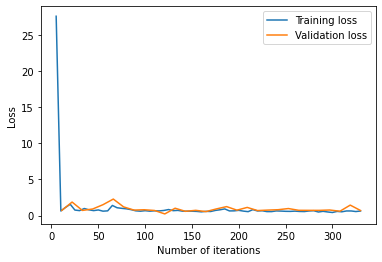

In [ ]:
plot_loss(stats_binary)

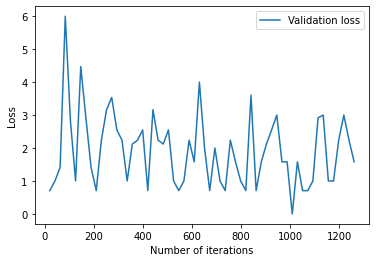

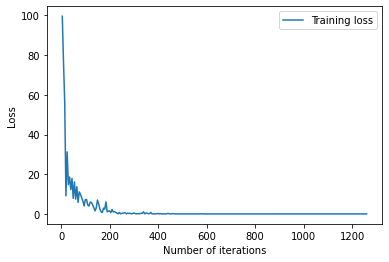

In [ ]:
plot_loss_val(stats_score)
plot_loss_train(stats_score)

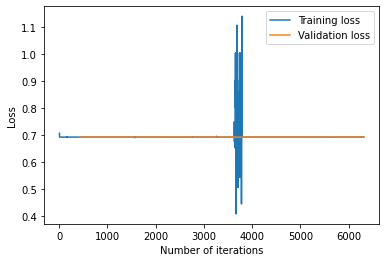

In [ ]:
plot_loss(stats)

In [ ]:
class_weights

(tensor([2148., 2058.]),
 tensor([2030.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.,  351.,  471.,  308.,  259.,
          262.,   88.,  319.,  118.]))

In [ ]:
from train_binary import *
_, wf1, _, _ = get_validation_performance_binary(best_model, class_weights[0], test_dl, device)
print("Test weighted F-1 for non-contextual classifier: {:.4f}".format(wf1))

In [ ]:
print(stats_score['weighted_F1'])
print(stats_score['confusion_mat'])

0.250384024577573
[[3 7 0 7 1 0 1 0]
 [1 5 0 0 3 0 0 0]
 [3 5 0 3 3 0 4 0]
 [4 0 0 1 2 0 6 0]
 [1 1 0 0 4 0 2 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:

from train import *
u, wf1, _, c = get_validation_performance(best_model, class_weights_bin, test_dl, device)
print("Test weighted F-1 for non-contextual classifier: {:.4f}".format(wf1))
c

output torch.Size([30, 2])
 
tensor([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1])
output torch.Size([30, 2])
 
tensor([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0])
output torch.Size([30, 2])
 
tensor([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 1]) tensor([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0])
output torch.Size([30, 2])
 
tensor([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1]) tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0])
output torch.Size([30, 2])
 

array([[102,  37],
       [113,  35]])

In [ ]:
c

array([[102,  37],
       [113,  35]])

In [ ]:
u

0.48514971806338714

In [ ]:

from train_score import *
u, wf1, _, c = get_validation_performance_binary(best_model, class_weights[1], test_dl, device)
print("Test weighted F-1 for non-contextual classifier: {:.4f}".format(wf1))

TypeError: ignored

In [ ]:
print(u)
print(c)

0.09197796934865901
[[ 7  6  0  2  4  0 10  0]
 [ 1  0  0  0  1  0  4  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  5  0  4  2  0 35  0]
 [ 0  5  0  0  1  0  3  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  5  0  2  0  0  3  0]
 [ 0  0  0  0  0  0  0  0]]


In [ ]:
loss_func = MultiTaskLossWrapper(2,model).to(data.device)
metric = metrics()
learn = Learner(data, model, loss_func=loss_func, callback_fns=ShowGraph, metrics=metrics)
#learn.split([learn.model.encoder[:6],learn.model.encoder[6:],nn.ModuleList([learn.model.fc1, learn.model.fc2])])
#learn.freeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,metrics,time


torch.Size([5, 1, 768])
True
torch.Size([5, 768])
torch.Size([5, 512])
torch.Size([5, 512])
torch.Size([5, 512])
torch.Size([5, 2])
False
False
tensor([[0.5317, 0.4422],
        [0.5425, 0.4212],
        [0.5254, 0.4207],
        [0.5030, 0.3925],
        [0.5297, 0.4399]], grad_fn=<SigmoidBackward0>) tensor([0., 1., 0., 1., 1.], requires_grad=True)
ccc
True
True
sss
True
True
True
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

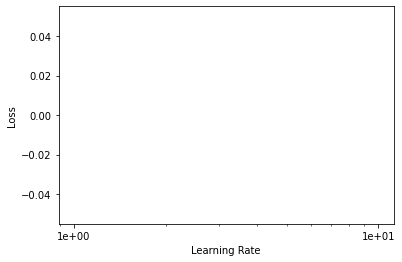

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(15,max_lr=1e-2,
                    callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='valid_loss', name='stage-1')])

In [ ]:

trn_loss_hist, trn_acc_hist, val_acc_hist = train(model, train_dl, valid_dl, 10)


Start training...
-----------------Epoch = 1-----------------


  0%|          | 0/22 [00:00<?, ?it/s]


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(10)
# train/val accuracies for MiniVGG
plt.figure()
plt.plot(x, trn_acc_hist)
plt.plot(x, val_acc_hist)
plt.legend(['Training', 'Validation'])
plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('fashion MNIST Classification')
plt.gcf().set_size_inches(10, 5)
plt.savefig('part1.png', dpi=300)
plt.show()

Learner(data=DataBunch;

Train: <dataset.MultiTaskDataset object at 0x7ff4bc2f9290>;

Valid: <dataset.MultiTaskDataset object at 0x7ff4bc2f9490>;

Test: None, model=MultiTaskModel(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): 